In [116]:
##폰트 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 한글 사용시 마이너스 폰트가 깨지는 문제가 발생할 수 있으므로 설정변경
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~~~~~')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'''
Header Information
고객번호,성별,연령대,주소(시도),고객등급,고객투자성향
df_cus.columns = ['cus_id', 'sex_dit_cd', 'cus_age', 'zip_ctp_cd', 'tco_cus_grd_cd', 'ivs_icn_cd']
계좌번호,고객번호,계좌개설년월
df_act.columns = ['act_id', 'cus_id', 'act_opn_ym']
종목코드,종목영문명,종목한글명
df_iem.columns = ['iem_cd', 'iem_eng_nm', 'iem_krl_nm']
계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드
df_trd_kr.columns = ['act_id', 'orr_dt', 'orr_ord', 'orr_rtn_hur', 'lst_cns_hur', 'iem_cd', 'sby_dit_cd', 'cns_qty', 'orr_pr', 'orr_mdi_dit_cd']
'''

path_cus = "cus_info.csv"
path_act = "act_info.csv"
path_iem = "iem_info.csv"
path_trd_kr = "trd_kr.csv"
path_trd_oss = "trd_oss.csv"

#df_cus = pd.read_csv("cus_info.csv")
# df_act = pd.read_csv("act_info.csv")
# df_iem = pd.read_csv("iem_info.csv")
# df_trd_kr = pd.read_csv("trd_kr.csv")
# df_trd_oss = pd.read_csv("trd_oss.csv")

In [2]:
#path1의 csv와 path2의 csv를 결합시켜준다 | label_name: 병합기준컬럼
def merge_csv(path1,path2,label_name,result_path):
    data1 = pd.read_csv(path1)
    data2 = pd.read_csv(path2)
    result = pd.merge(data1, data2, how = 'left', on = label_name)
    if not result_path:
        return result
    else:
        result.to_csv(result_path, index=False)
        
#path1의 csv파일을 샘플링해준다 | #percentile: 샘플링 비율 , seed: 시드값
def sampling_csv(path1,percentile,seed,result_path):
    from sklearn.model_selection import train_test_split
    data1 = pd.read_csv(path1)
    result, dummy = train_test_split(data1, train_size=percentile, random_state=seed)
    result.to_csv(result_path, index=False)
    if not result_path:
        return result
    else:
        result.to_csv(result_path, index=False)
        
#path1의 csv파일을 특정 컬럼의 범주별로 스플릿해서 저장
def split_csv(path1, label_name, prefix_path):
    data1 = pd.read_csv(path1)
    data1 = data1.sort_values(by=label_name)
    for i in data1[label_name].unique():
        temp = data1[data1[label_name] == i]
        temp.to_csv("{:}_{:}.csv".format(prefix_path,i), index=False)

def split_data_by_percentile(data1, label_name, percentile1, percentile2, how): #percentile: 비율 , how: 'q'/'c'  전체 데이터 수에 대해서/누적값에 대해서
    label_data = data1[label_name]
    label_data = label_data.sort_values(ascending=False)
    if how=='ca':
        label_data = label_data[::-1]
    percentile1, percentile2 = percentile1*0.01, percentile2*0.01
    if how == 'q': #Qunatile Function
        return data1[(label_data.values >= label_data.quantile(q=percentile1)) & (label_data.values <= label_data.quantile(q=percentile2))]
    if how == 'ca' or how == 'cd': #Accumulative Ascending & Descending
        cum_data = label_data.cumsum()
        target1 = cum_data.iloc[-1] * percentile1
        target2 = cum_data.iloc[-1] * percentile2
        return data1[(cum_data.values >= target1) & (cum_data.values <= target2)]
    print("Invaled Tag ['q' or 'ca' or 'cd']")
    return None

def swap_column(df, i, j):
    temp = df.columns.tolist()
    temp[i], temp[j] = df.columns[j], df.columns[i]
    return df[temp]

## 1. 데이터 결합 및 샘플링 하기

In [3]:
'''
sampling_csv(path_trd_kr,0.05,100,"trd_kr_s100.csv")
merge_csv(path_act,path_cus,'cus_id','merged_act_cus.csv')
merge_csv("trd_kr_s100.csv","merged_act_cus.csv",'act_id','merged_s100.csv')
merge_csv(path_trd_kr,"merged_act_cus.csv",'act_id','merged_TKAC.csv')
merge_csv(path_trd_oss,'merged_act_cus.csv','act_id','merged_TOAC.csv')
'''
print("Done!")

Done!


## 2. 데이터 컬럼 별 분포 확인 : 히스토그램
* 결합이 끝난 데이터의 히스토그램을 확인한다.

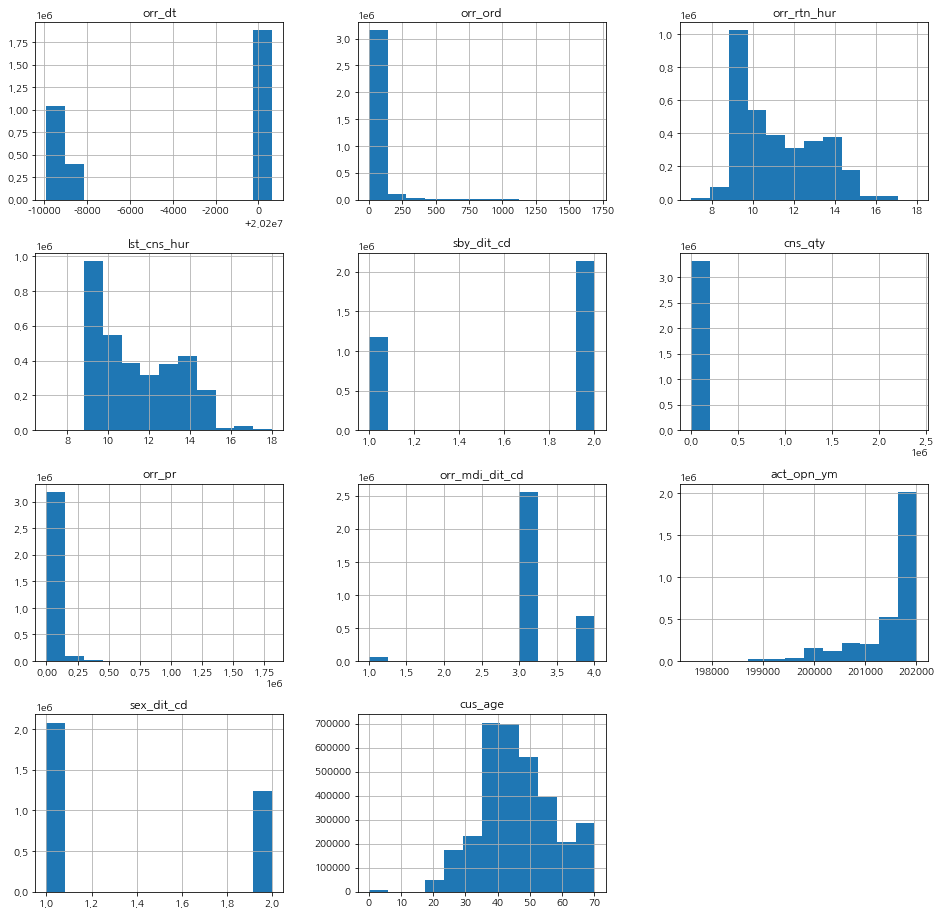

In [99]:
df = pd.read_csv("merged_s100.csv")
#df = pd.read_csv("merged_TKAC.csv")
df.hist(bins=12, figsize=(16,16))
plt.show()

* orr_dt (주문날짜) [1번 그래프] <p>
    좌우 끝으로 치우친 히스토그램이 나타나는데, 이는 날짜 데이터를 전처리 하지 않아서 발생한 문제이다.
* orr_ord (주문순서) <p>
    거의 모든 거래 데이터의 주문 순서가 200번대 이하임을 알 수 있다.
* orr_rtn_hur, lst_cns_hur (주문 접수 시간대, 최종 체결시간대) <p>
    접수 시간대와 체결 시간대가 거의 유사함을 알 수 있다. 접수 시간대의 경우 장 개시 이전에 접수를 걸어둔 주문이 조금 있는데, 이 부분에서 Y세대와 Z세대가 존재하는지의 여부로 그들이 분석적인 투자를 하는 경향이 있는지 유추할 수 있다.
* sby_dit_cd (매매구분코드) <p>
    전체 매도 수량과 매수 수량은 1:1로 대응될거라는 예상과는 달리, 주문 횟수는 다르다는 인사이트를 얻을 수 있었다. 즉, 주식을 살 때는 분할해서 사는 경향이 강한 반면, 팔때는 한 번에 파는 경향이 강하다는 것을 예측할 수 있다.  
* orr_mdi_dit_cd (주문매체구분코드) <p>
    현재 주식 투자 매체의 대세가 홈트레이딩(HTS, PC) 에서 모바일트레이딩(MTS, Mobile)로 넘어온 것을 확인할 수 있다. 그러나 이 또한 세대별로 그 분포가 다를 것으로 예상된다.
* CNS_QTY (체결수량) <p>
    사실 체결수량의 경우, 해당 주식 종목이 가격이 낮을수록 그 수량이 많아지고 높을 수록 수량이 작아지므로 유의미한 데이터는 아니다. 해당 컬럼은 ORP_PR(체결가격)과 함께 다시 분석해야 제대로 된 의미를 나타낼 것이다.
* sex_dit_cd (성별) <p>
    주식 투자 성별의 비가 남녀 2:1라는 것을 알 수 있지만, 이 비율이 연령대에 따라 어떻게 달라지는지 조금 더 확인해볼 필요가 있다.
* cus_age (연령) <p>
    주식 시장에서 20대, 30대의 분포가 낮다는 것을 알 수 있는데, 더 많은 이용자를 확보하고 좋은 투자 상품을 제안하기 위한 방법을 모색해야 할 것이다.

### 2-1. 주문날짜 (orr_dt) 전처리 및 데이터 분석
#### 주식 거래량은 어떻게 변화하고 있을까?
주문 날짜의 히스토그램은 양쪽으로 극단적으로 치우쳐 있는데, 이는 날짜 전처리를 하지 않았기 때문

In [100]:
df['orr_dt'] = pd.to_datetime(df['orr_dt'],format='%Y%m%d')
print("데이터 상 거래 시작일 : ",df['orr_dt'].min())
print("데이터 상 거래 종료일 : ",df['orr_dt'].max())

데이터 상 거래 시작일 :  2019-01-02 00:00:00
데이터 상 거래 종료일 :  2020-06-30 00:00:00


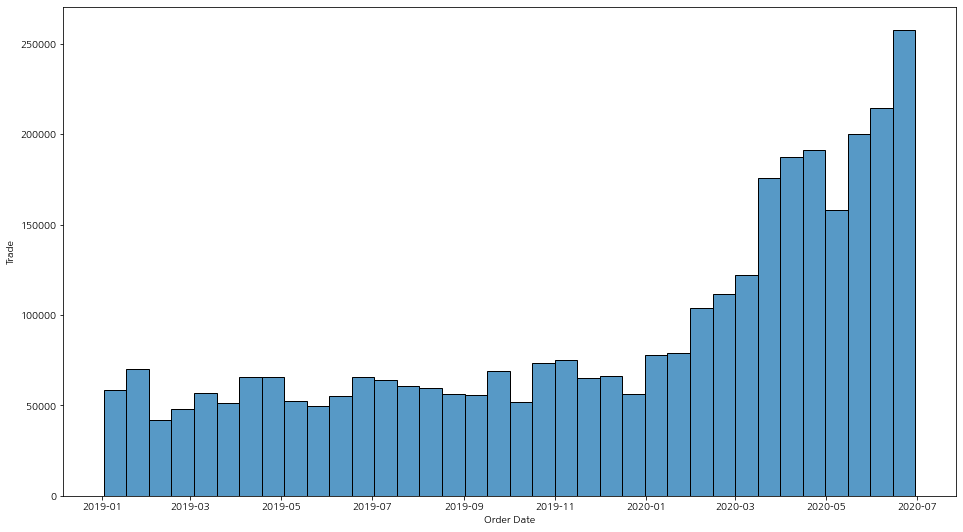

In [101]:
target_date = pd.Timestamp('2019-01-01')
df['orr_dt_fix'] = df['orr_dt'] - target_date

plt.figure(figsize=(16, 9))

sns.histplot(df['orr_dt_fix'].dt.components.days,x=df['orr_dt'],bins=36)
plt.xlabel('Order Date')
plt.ylabel('Trade')
plt.show()

2020년 초부터 주식 거래량이 급증했음을 알 수 있음. 총 18개월 정도의 데이터가 있는데, Y세대, Z세대의 주식 거래 동향을 파악하기 위해 2019년 11월부터 라벨링을 거친 후 다시 분석

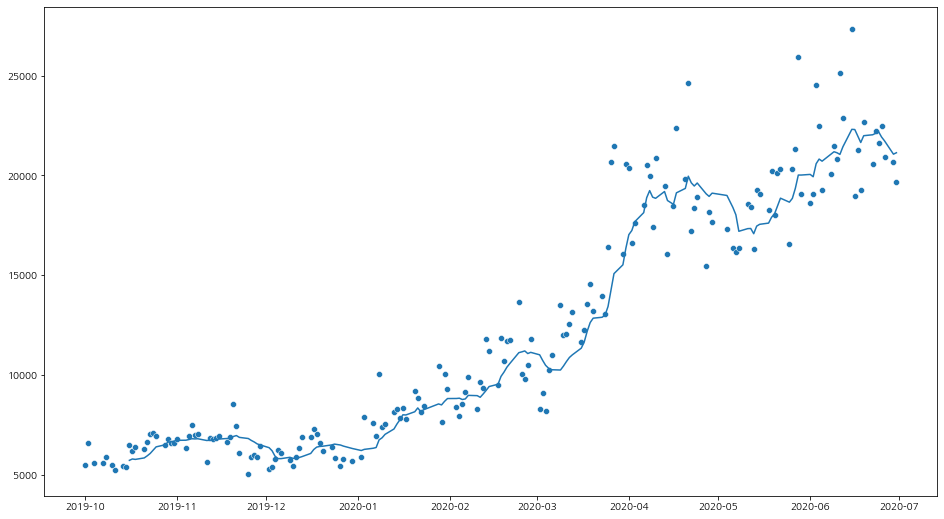

In [103]:
target_date = pd.Timestamp('2019-10-01')
df['orr_dt_fix'] = df['orr_dt'] - target_date
df2 = df[df['orr_dt_fix'].dt.components.days>=0]
df3 = df2['orr_dt_fix'].value_counts().sort_index()
df4 = df3.rolling(window=10).mean()

plt.figure(figsize=(16, 9))
sns.scatterplot(x = df3.index + target_date, y=df3.values)
sns.lineplot(x = df4.index + target_date, y=df4.values)
plt.show()

최근 10일간의 평균 거래량을 lineplot으로 그려 경향을 파악하였다.

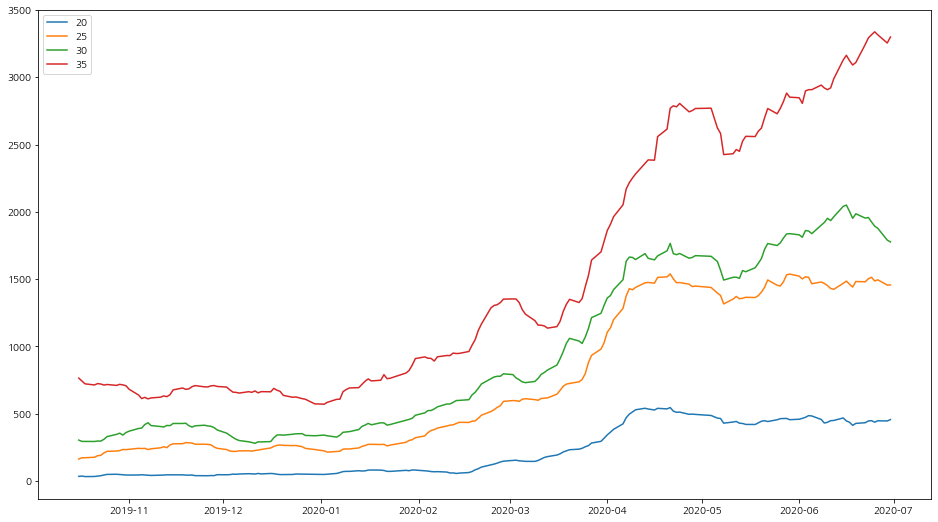

In [104]:
target_age = [20, 25, 30, 35]

plt.figure(figsize=(16, 9))
for i in target_age:
    temp = df2[df2['cus_age'] == i]
    temp = temp['orr_dt_fix'].value_counts().sort_index()
    temp = temp.rolling(window=10).mean()
    sns.lineplot(x = temp.index + target_date, y=temp.values, label=i)
plt.show()


10일 평균 거래량 시계열 그래프를 통해, 25세 이후부터 2020년 투자에 대한 관심이 증가하였음을 알 수있음
20~25세 연령대도 거래량이 증가했지만, 다른 집단에 비해 높지는 않음을 알 수 있다.

### 2-2. 체결수량 (orr_dt), 체결가격(orp_pr) 전처리 및 데이터 분석
#### 연령 별 주식 활동량은 어떻게 될까?
한 건의 거래 데이터에서 해당 거래의 규모가 얼마나 큰 건이었는지를 알기 위해서는 체결 수량과 체결 가격을 곱하여서 거래액을 확인해보면 된다. 하지만 우리는 특정 사용자가 얼마나 거래를 활발하게 하는가를 파악하고 이를 Y세대와 Z세대에 적용할 예정이기 때문에, 각 사용자별 거래액을 파악할 필요가 있을 것이다. 

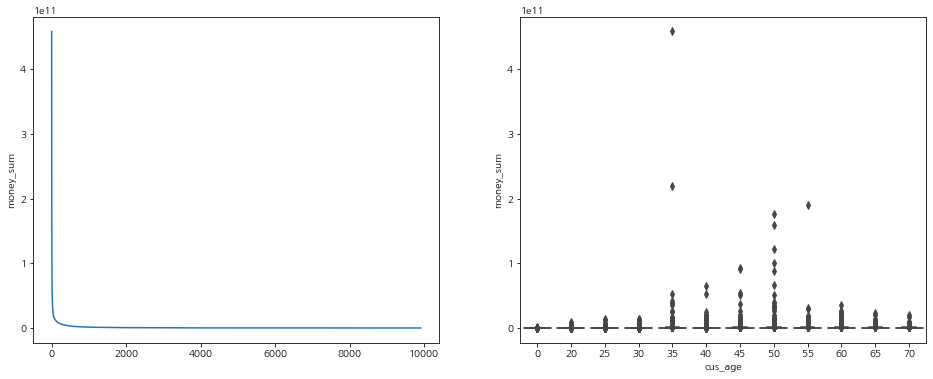

In [105]:
df['money'] = df['cns_qty']*df['orr_pr']
df2 = pd.DataFrame(df.groupby(['cus_id','cus_age','tco_cus_grd_cd'])['money'].sum())

df2.sort_values(by='money',ascending=False,inplace=True)
df2.rename(columns = {'money' : 'money_sum'}, inplace = True)
df2.reset_index(level=[0,1,2], inplace = True)

from matplotlib.cbook import boxplot_stats
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
sns.lineplot(x=range(len(df2)), y=df2['money_sum'], ax=ax)
ax = fig.add_subplot(1,2,2)
sns.boxplot(x='cus_age',y='money_sum',data=df2, ax=ax)
plt.show()

데이터 분석 결과 사용자별 거래 활동 금액의 차이가 꽤 크다는 것을 알 수 있었다. 보다 정확한 데이터 분석을 위해, boxplot에서 outlier를 제거하고, 해당 outlier 군집을 대상으로 한 번 더 boxplot을 그린 후 결과를 관찰하기로 한다.

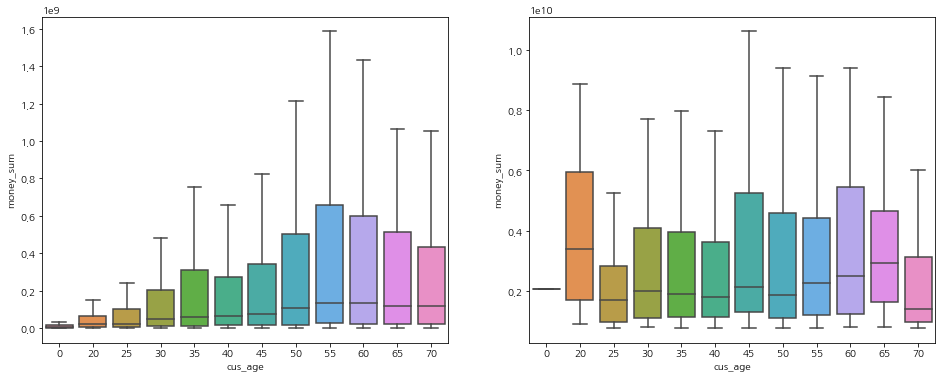

In [106]:
outliers = [ol for stat in boxplot_stats(df2['money_sum']) for ol in stat['fliers']]
temp_df = pd.DataFrame(columns=df2.columns)
for i in outliers:
    temp_df = temp_df.append(df2[df2['money_sum']==i],ignore_index=True)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
sns.boxplot(x='cus_age',y='money_sum',data=df2, ax=ax, showfliers=False)
ax = fig.add_subplot(1,2,2)
sns.boxplot(x='cus_age',y='money_sum',data=temp_df, ax=ax, showfliers=False)
sns.boxplot
plt.show()

outlier를 배제한 boxplot (왼쪽) 에 따르면 연령대가 증가할수록 거래가 활발한 사용자가 대체로 더 많음을 확인할 수 있다. 그리고 오른쪽 boxplot에 따르면 outlier 집단에 속한 상위권의 군집은 연령대별로 대체로 비슷한 경향을 보이는 것을 관찰할 수 있다. 왼쪽 군집과 오른쪽 군집의 연령별 고객등급 분포를 보면 보다 확실하게 그 경향성을 파악할 수 있을것이다.

### 2-3. orr_mdi_dit_cd (주문매체구분코드) 데이터 분석
#### 홈트레이딩(HTS) 에서 모바일 트레이딩(MTS) 으로
현재 주식 투자 매체의 대세가 홈트레이딩(HTS, PC) 에서 모바일트레이딩(MTS, Mobile)로 넘어온 것을 확인할 수 있다. 그러나 이 또한 세대별로 그 분포가 다를 것으로 예상된다. 

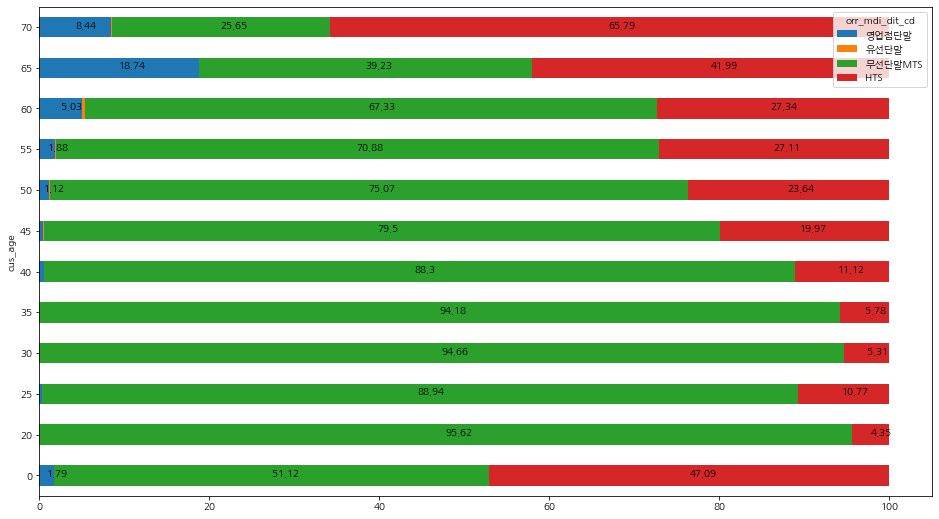

In [117]:
df_temp = pd.DataFrame(df.groupby(['cus_age','orr_mdi_dit_cd'])['act_id'].count()).unstack()
df_temp.fillna(0, inplace=True)
df_temp.rename(columns = {1: '영업점단말' , 2: '유선단말', 3: '무선단말MTS' , 4: 'HTS' }, inplace = True)
df_temp = df_temp.xs('act_id',axis=1)
for i in df_temp.index:
    df_temp.loc[i,:] /= df_temp.loc[i,:].sum()
    df_temp.loc[i,:] *= 100
    
ax = df_temp.plot(kind='barh',stacked=True,figsize=(16,9))
for i in range(len(df_temp)):
    temp=0
    for j in df_temp.iloc[i,:]:
        if j>1:
            ax.text(temp+j/2, i, round(j,2), color="black")
            temp+=j
plt.show()

### 2-4. orr_rtn_hur, lst_cns_hur (주문 접수 시간대, 최종 체결시간대) 분석
#### 투자 성향 별 주문 접수 시간대

In [ ]:
df = pd.read_csv("merged_s100.csv")